<a href="https://colab.research.google.com/github/AzulBarr/Aprendizaje-Automatico/blob/main/TPs/05_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico - Aprendizaje supervisado
## Clasificación de expresiones genómicas

# Ejercicio 1
## Separación de datos
Contarán con una cantidad limitada de datos, por lo cual es importante tomar una buena decisión en el momento de empezar a utilizarlos.

Evaluar y justificar cómo separarán sus datos para desarrollo y para evaluación. ¿Qué consideraciones tuvieron en cuenta para realizar esta división?

Importante: en este punto no está permitido dividir la base de datos utilizando la función train_test_split de sklearn. Deben decidir e implementar la separación.

In [1]:
# Librerias
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
def train_test_split(df: pd.DataFrame, proporcion_test: float = 0.2, target: str = "target", random_state: int = 7 ) -> tuple:
  cantidad_true = len(df[df[target]==True])
  cantidad_false = len(df) - cantidad_true

  df_true = df[df[target]==True]
  df_false = df[df[target]==False]

  df_test_true = df_true.sample(n=round(proporcion_test * cantidad_true), random_state=random_state)
  df_test_false = df_false.sample(n=round(proporcion_test * cantidad_false), random_state=random_state)

  df_test = pd.concat([df_test_true, df_test_false])
  df_train = df.drop(df_test.index)

  X_train = df_train.drop(target, axis=1)
  y_train = df_train[target]
  X_test = df_test.drop(target, axis=1)
  y_test = df_test[target]

  return X_train, X_test, y_train, y_test

In [6]:
datos = pd.read_csv("data.csv")
X_train, X_test, y_train, y_test = train_test_split(datos, 0.1)

# Ejercicio 2


### Construcción de modelos

Para este punto, la tarea consiste en construir y evaluar modelos de tipo **árbol de decisión**. Además, obtener una **estimación realista de la performance** de los mismos.

1. Entrenar un árbol de decisión con altura máxima 3 y el resto de los hiperparámetros en default.

1. Estimar la performance del modelo utilizando _K-fold cross validation_ con `K=5`, con las métricas _Accuracy_, _Area Under the Precision-Recall Curve (AUPRC)_, y _Area Under the Receiver Operating Characteristic Curve (AUCROC)_.

   En esta oportunidad se va a pedir además de calcular las métricas para cada fold por separado y su promedio, que hagan el cálculo del score global (como vimos en clase), sólo para los folds de validación.
   
   Reportar el resultado en una tabla similar a:

      <table>
      <thead>
      <tr>
      <th align="center">Permutación</th>
      <th>Accuracy (training)</th>
      <th>Accuracy (validación)</th>
      <th>AUPRC (training)</th>
      <th>AUPRC (validación)</th>
      <th>AUC ROC (training)</th>
      <th>AUC ROC (validación)</th>
      </tr>
      </thead>
      <tbody>
      <tr>
      <td align="center">1</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">2</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">3</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">4</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">5</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">Promedios</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <td align="center">Global</td>
      <td>(NO) </td>
      <td></td>
      <td>(NO) </td>
      <td></td>
      <td>(NO) </td>
      <td></td>
      </tr>
      </tbody>
      </table>    
  
   **Importante**: de acá en más sólamente utilizaremos el score promedio cuando hagamos _K-fold cross-validation_.

1. Explorar las siguientes combinaciones de parámetros para  árboles de decisión (siguiendo con $k-fold$ con $k=5$) utilizando [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html) de _scikit learn_. No está permitido utilizar `GridSearchCV` en este ejercicio.

   <table>
   <thead>
   <tr>
   <th align="center">Altura máxima</th>
   <th align="center">Criterio de corte</th>
   <th>Accuracy (training)</th>
   <th>Accuracy (validación)</th>
   </tr>
   </thead>
   <tbody><tr>
   <td align="center">3</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">3</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   </tbody></table>

1. ¿Qué conclusiones se pueden sacar de estas tablas?  

In [7]:
from six import StringIO
from IPython.display import Image, display
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import ParameterGrid

In [8]:
def dibujar_arbol(clf, c_name, f_name):
    dot_data = StringIO()
    sk.tree.export_graphviz(clf, out_file = dot_data,
                    filled = True,
                    class_names = c_name,
                    feature_names = f_name,
                    special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

In [9]:
#2.1
arbol = sk.tree.DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

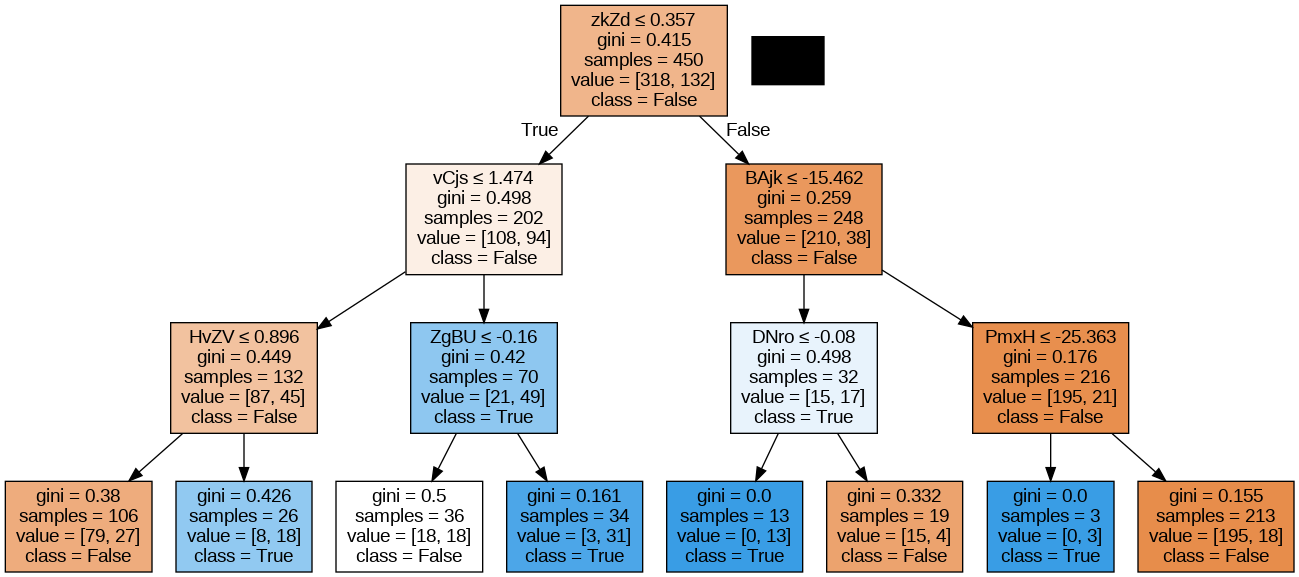

In [10]:
dibujar_arbol(arbol, c_name = ["False", "True"], f_name= X_train.columns.tolist())

In [11]:
#2.2
def accuracy(y_predicted, y_real):
  n = len(y_real)
  aciertos = sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])

  return aciertos / n

def train_tree(X_tr : np.ndarray, y_tr: np.ndarray, tree_params = {}) -> DecisionTreeClassifier:
  arbol = DecisionTreeClassifier(**tree_params)
  arbol.fit(X_tr, y_tr)
  return arbol

def tree_predict_proba(ab: DecisionTreeClassifier, X_test: np.ndarray) -> np.ndarray:
  predictions = ab.predict_proba(X_test)
  return predictions

In [12]:
def k_fold_cross_validation(X_tr : np.ndarray, y_tr : np.ndarray, k: int, tree_params = {}):

  kf = StratifiedKFold(n_splits=k)

  y_pred_eval = np.empty(y_tr.shape)
  y_pred_eval.fill(np.nan)
  y_pred_proba_eval = np.empty(y_tr.shape)
  y_pred_proba_eval.fill(np.nan)

  score_por_fold_ac_eval = []
  score_por_fold_rocauc_eval = []
  score_por_fold_precision_recall_eval = []

  score_por_fold_ac_train = []
  score_por_fold_rocauc_train = []
  score_por_fold_precision_recall_train = []

  for train_index, test_index in kf.split(X_tr, y_tr):

    #armo los folds, y los indices que me quedan van a testarse

    kf_X_train, kf_X_test = X_tr.iloc[train_index], X_tr.iloc[test_index]
    kf_Y_train, kf_Y_test = y_tr.iloc[train_index], y_tr.iloc[test_index]

    y_pred_train = np.empty(kf_Y_train.shape) #para calcular metricas en train
    y_pred_train.fill(np.nan)

    arbol_k_fold = train_tree(kf_X_train,kf_Y_train,tree_params)

    predicciones_eval = tree_predict_proba(arbol_k_fold,kf_X_test)
    predicciones_train = tree_predict_proba(arbol_k_fold, kf_X_train)

    y_pred_proba_eval[test_index] = predicciones_eval[:,1] #Me quedo con la columna que me dice que tanta probabilidad de estar en la clase postiva (osea 1) tiene
    y_pred_proba_train = predicciones_train[:,1]

    #paso a binaria la clasificacion
    for i in test_index:
      if y_pred_proba_eval[i] >= 0.5:
        y_pred_eval[i] = 1
      else:
        y_pred_eval[i] = 0

    for i in range(len(y_pred_proba_train)):
      if y_pred_proba_train[i] >= 0.5:
        y_pred_train[i] = 1
      else:
        y_pred_train[i] = 0

    score_fold_k_ac_eval = accuracy(y_pred_eval[test_index],kf_Y_test) #metrica accuracy sobre validacion
    score_fold_k_ac_train = accuracy(y_pred_train, kf_Y_train) #metrica accuracy sobre train

    score_fold_k_rocauc_eval = roc_auc_score(kf_Y_test,y_pred_proba_eval[test_index]) #metrica rocauc sobre validacion
    score_fold_k_rocauc_train = roc_auc_score(kf_Y_train,y_pred_proba_train) #metrica rocauc sobre train

    precision, recall, thresholds = precision_recall_curve(kf_Y_test, y_pred_proba_eval[test_index]) #me da para cada threshold el precision y recall
    score_fold_k_aucprc_eval = auc(recall,precision) #metrica aucprc, calcula el area bajo la curva de precision vs recall sobre evaluacion
    precision_train, recall_train, thresholds_train = precision_recall_curve(kf_Y_train, y_pred_proba_train) #me da para cada threshold el precision y recall sobre train
    score_fold_k_aucprc_train = auc(recall_train,precision_train) #metrica aucprc, calcula el area bajo la curva de precision vs recall sobre train

    score_por_fold_ac_eval.append(score_fold_k_ac_eval)
    score_por_fold_rocauc_eval.append(score_fold_k_rocauc_eval)
    score_por_fold_precision_recall_eval.append(score_fold_k_aucprc_eval)

    score_por_fold_ac_train.append(score_fold_k_ac_train)
    score_por_fold_rocauc_train.append(score_fold_k_rocauc_train)
    score_por_fold_precision_recall_train.append(score_fold_k_aucprc_train)

  return y_pred_eval, y_pred_proba_eval, score_por_fold_ac_eval, score_por_fold_rocauc_eval, score_por_fold_precision_recall_eval, score_por_fold_ac_train, score_por_fold_rocauc_train, score_por_fold_precision_recall_train

In [13]:
parametros = {"max_depth": 3,"criterion":"entropy","random_state" : 4}
k = 5

y_pred, y_pred_proba, score_fold_ac, score_fold_aucroc, score_fold_aucprc, score_fold_ac_train, score_fold_aucroc_train, score_fold_aucprc_train = k_fold_cross_validation(X_train,y_train,k,parametros)

ac_global = accuracy(y_pred, y_train)
roc_auc_global = roc_auc_score(y_train,y_pred_proba)
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_proba)
aucprc_global = auc(recall, precision)

score_fold_ac.append(np.mean(score_fold_ac))
score_fold_aucroc.append(np.mean(score_fold_aucroc))
score_fold_aucprc.append(np.mean(score_fold_aucprc))

score_fold_ac_train.append(np.mean(score_fold_ac_train))
score_fold_aucroc_train.append(np.mean(score_fold_aucroc_train))
score_fold_aucprc_train.append(np.mean(score_fold_aucprc_train))

score_fold_ac_train.append("NO")
score_fold_ac.append(ac_global)
score_fold_aucroc_train.append("NO")
score_fold_aucroc.append(roc_auc_global)
score_fold_aucprc_train.append("NO")
score_fold_aucprc.append(aucprc_global)

tabla = {"Accuracy (train)" : score_fold_ac_train, "Accuracy (eval)" : score_fold_ac,
         "AUCROC (train)" : score_fold_aucroc_train, "AUCROC (eval)" : score_fold_aucroc,
         "AUCPRC (train)" : score_fold_aucprc_train, "AUCPRC (eval)" : score_fold_aucprc}

data_frame_metricas = pd.DataFrame(tabla)
data_frame_metricas.index = [1, 2, 3, 4, 5, "Promedio", "Global"]

data_frame_metricas

,Accuracy (train),Accuracy (eval),AUCROC (train),AUCROC (eval),AUCPRC (train),AUCPRC (eval)
1,0.808333,0.700000,0.826517,0.706937,0.738263,0.473499
2,0.838889,0.733333,0.861849,0.652557,0.787921,0.476537
3,0.813889,0.700000,0.859029,0.677284,0.751993,0.500724
4,0.822222,0.666667,0.844042,0.618690,0.777791,0.374998
5,0.847222,0.733333,0.866439,0.707031,0.787436,0.573211
Promedio,0.826111,0.706667,0.851575,0.672500,0.768681,0.479794
Global,NO,0.706667,NO,0.681675,NO,0.459899


In [16]:
#2.3
## Parameter grid
param_grid = {"max_depth" : [3,5,None], "criterion": ["gini","entropy"]}

grid = list(ParameterGrid(param_grid))

print("List of grids:\n{}".format(param_grid))
print(grid)

List of grids:
{'max_depth': [3, 5, None], 'criterion': ['gini', 'entropy']}
[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': None}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': None}]


In [20]:
accuracy_X_train = []
accuracy_X_eval = []

for parameters in grid:

  y_pred, y_pred_proba, score_fold_ac, score_fold_aucroc, score_fold_aucprc, score_fold_ac_train, score_fold_aucroc_train, score_fold_aucprc_train = k_fold_cross_validation(X_train,y_train,5,parameters)
  accuracy_X_train.append(np.mean(score_fold_ac_train))
  accuracy_X_eval.append(np.mean(score_fold_ac))


alturas = [3,5,"infinito",3,5,"infinito"]
criterio = ["Gini","Gini","Gini","Entropia","Entropia","Entropia"]

datos = {"alturas" : alturas, "criterio" : criterio,"Accuracy (training)" : accuracy_X_train,"Accuracy (evaluation)" : accuracy_X_eval}

data_frame_k_fold = pd.DataFrame(datos)

data_frame_k_fold

,alturas,criterio,Accuracy (training),Accuracy (evaluation)
0,3,Gini,0.840000,0.722222
1,5,Gini,0.942222,0.726667
2,infinito,Gini,1.000000,0.713333
3,3,Entropia,0.826111,0.697778
4,5,Entropia,0.917222,0.677778
5,infinito,Entropia,1.000000,0.664444


# Ejercicio 3


## Comparación de algoritmos

Se pide explorar distintas combinaciones de algoritmos de aprendizaje con diferentes configuraciones con el objetivo de encontrar el mejor modelo de cada familia de buscar la performance óptima. Para este ejercicio realizar una experimentación utilizando RandomizedSearchCV. Como métrica de performance usar AUCROC resultante de 5-fold cross-validation.

Hiperparámetros: Revisar la documentación de cada uno de los hiperparámetros para entender qué posibles hiperparámetros impacten de manera positiva en la construcción del algoritmo.

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt

**Definimos los hiperparametros a explorar para cada modelo**


In [22]:
param_dist_tree = {
    "max_depth": [None, 5, 10, 20, 30],           # Controla la complejidad del árbol
    "min_samples_split": [2, 5, 10, 20, 50],      # Evita divisiones con muy pocas muestras
    "min_samples_leaf": [1, 2, 5, 10],            # Evita hojas con muy pocas muestras
    "max_features": [None, "sqrt", "log2"],       # Regularización al elegir features
    "criterion": ["gini", "entropy"],             # Función de impureza
    "class_weight": [None, "balanced"]            # Para balancear si las clases están desbalanceadas
}


param_dist_knn = {
    'n_neighbors': randint(low=1, high=30), #Numero de vecinos
    'weights': ['uniform', 'distance'], #Forma de asignarle pesos a los vecinos
    'metric': ['euclidean', 'manhattan', 'cosine'] #Metrica para calcular la distancia
}

param_dist_svm = param_dist = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1, 10],  # relevante para rbf, poly, sigmoid
    "degree": [2, 3, 4]  # solo se usa si kernel="poly"
}


## Arboles de Decision

Corremos `RandomizedSearchCV` para el modelo de Arboles de decision en nuestro espacio de busqueda.



In [23]:
modelo_arbol = DecisionTreeClassifier()

random_search_tree = RandomizedSearchCV(
    modelo_arbol,
    param_distributions=param_dist_tree,
    n_iter=100, # numero de iteraciones
    cv=5, #5 fold cross validation
    scoring='roc_auc', #metrica ROC-Auc
    random_state=87122 #Seed
)

random_search_tree.fit(X_train, y_train)

print("Best parameters for Decision Tree:")
print(random_search_tree.best_params_)
print("Best AUCROC score for Decision Tree:")
print(random_search_tree.best_score_)

Best parameters for Decision Tree:
{'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini', 'class_weight': None}
Best AUCROC score for Decision Tree:
0.6971640338827839


In [24]:
y_pred_proba_tree = random_search_tree.best_estimator_.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

In [27]:
print(roc_auc_tree)

0.560952380952381


## KNN

Corremos `RandomizedSearchCV` para Knn en nuestro espacio de busqueda.

In [28]:
modelo_knn = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(
    modelo_knn,
    param_distributions=param_dist_knn,
    n_iter=50,  # Nro de iteraciones.
    cv=5,  # 5-fold cross validation
    scoring='roc_auc',  # AUCROC metric
    random_state=87122 # Seed
)

random_search_knn.fit(X_train, y_train)

print("Best parameters for KNN:")
print(random_search_knn.best_params_)
print("Best AUCROC score for KNN:")
print(random_search_knn.best_score_)

Best parameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'uniform'}
Best AUCROC score for KNN:
0.8841587457038846


In [29]:
y_pred_proba_knn = random_search_knn.best_estimator_.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

In [30]:
print(roc_auc_global)

0.6816752429959976


## SVM

In [31]:
modelo_svm = SVC(probability=True)

random_search_svm = RandomizedSearchCV(
    modelo_svm,
    param_distributions=param_dist_svm,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=87122
)

random_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:")
print(random_search_svm.best_params_)
print("Best AUCROC score for SVM:")
print(random_search_svm.best_score_)

Best parameters for SVM:
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 100}
Best AUCROC score for SVM:
0.9065275516664405


In [48]:
# SVM (mejor modelo)
y_pred_proba_svm = random_search_svm.best_estimator_.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

In [49]:
print(roc_auc_svm)

0.9352380952380952


## Comparacion con LDA y Naive Bayes

In [35]:
# LDA con 5-fold CV
lda_scores = cross_val_score(
    LinearDiscriminantAnalysis(),
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)
print(f"LDA - AUC-ROC (5-fold CV): {lda_scores.mean():.4f}")

# Naive Bayes con 5-fold CV
nb_scores = cross_val_score(
    GaussianNB(),
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)
print(f"Naive Bayes - AUC-ROC (5-fold CV): {nb_scores.mean():.4f}")

LDA - AUC-ROC (5-fold CV): 0.7277
Naive Bayes - AUC-ROC (5-fold CV): 0.8119


In [42]:
# Calcular AUC para LDA y Naive Bayes con CV
lda_auc = cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train,
                           cv=5, scoring='roc_auc').mean()
nb_auc = cross_val_score(GaussianNB(), X_train, y_train,
                          cv=5, scoring='roc_auc').mean()
print(lda_auc)
print(nb_auc)

0.7276508727897617
0.8119339443992221


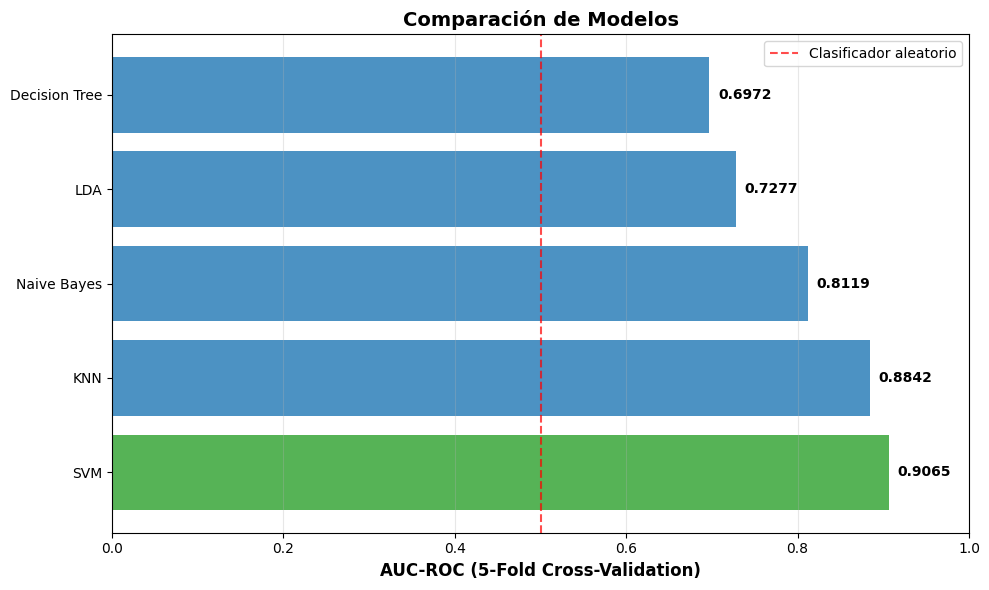

In [43]:
# Crear gráfico de barras
modelos_nombres = ['SVM', 'KNN', 'Naive Bayes', 'LDA', 'Decision Tree']
auc_scores = [
    random_search_svm.best_score_,
    random_search_knn.best_score_,
    nb_auc,
    lda_auc,
    random_search_tree.best_score_
]

# Ordenar por performance
datos_ordenados = sorted(zip(modelos_nombres, auc_scores),
                         key=lambda x: x[1], reverse=True)
modelos_ordenados, scores_ordenados = zip(*datos_ordenados)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
colores = ['#2ca02c' if score == max(scores_ordenados) else '#1f77b4'
           for score in scores_ordenados]
barras = ax.barh(modelos_ordenados, scores_ordenados, color=colores, alpha=0.8)

# Agregar valores sobre las barras
for i, (modelo, score) in enumerate(zip(modelos_ordenados, scores_ordenados)):
    ax.text(score + 0.01, i, f'{score:.4f}',
            va='center', fontweight='bold', fontsize=10)

ax.set_xlabel('AUC-ROC (5-Fold Cross-Validation)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Modelos', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1.0])
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5,
           label='Clasificador aleatorio', alpha=0.7)
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusiones

**Mejor Modelo**: SVM

**HiperParámetros**: 'C': 3.677, 'gamma': 'scale', 'kernel': 'rbf'

## Ejercicio 4:
### Evaluación de performance

- La entrega del trabajo estará acompañada de una evaluación en la cual deberán poner a prueba su mejor modelo y sobre todo, su capacidad para estimar sus resultados.

- Su tarea será estimar la performance (AUCROC) que tendrá su mejor modelo en datos de evaluación (X_held_out).

- Para ello, deberán predecir las **probabilidades** (probabilidad de la clase positiva) de las distintas instancias con su modelo, enviarnos dichas probabilidades junto a una estimación con 4 decimales de cuál será el AUCROC resultante y calcularemos el resultado real. Consideraremos que el **mejor modelo será el que se encuentre más cerca del valor real que calcularemos luego de la entrega**.

- Recomendamos no perder de vista esta evaluación/competencia durante el desarrollo del TP, sobretodo en el momento de separar los datos en los primeros puntos.

- Para que podamos evaluar la performance, junto con la entrega del informe, deberán enviar un archivo con el numero de grupo con dos digitos en formato csv con la columna `output` y el valor obtenido con 4 decimales (se subirá un ejemplo cuando se publiquen los datos de la competencia) y un valor esperado de AUCROC: `GG_y_pred_held_out_AUCROC`.

    - Ej.: el grupo tres cree que obtuvo un valor de 0.7321 de AUCROC deberá submitear un archivo llamado: `03_y_pred_held_out_7321.csv`.

- Los datos podrán encontrarlos en este [link](https://github.com/aprendizaje-automatico-dc-uba-ar/material/tree/main/tp/01_aprendizaje_supervisado/datos).

- Las decisiones de este punto pueden desarrollarse hasta en una carilla, aunque con media debería alcanzar.


In [50]:
#Modelo elegido: SVM random_search_svm.best_estimator_
y_pred_proba_svm = random_search_svm.best_estimator_.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(roc_auc_svm)

0.9352380952380952


In [ ]:
# esperamos que el AUCROC con los datos de evaluación (X_held_out) sea: 0.9352}

In [56]:
X_held_out = pd.read_csv("X_held_out.csv")
y_pred_held_out_9352 = random_search_svm.best_estimator_.predict_proba(X_held_out)[:, 1]
print(y_pred_held_out_9352[:10])

[0.04113568 0.06650752 0.0709483  0.17067679 0.01279685 0.02293649
 0.305481   0.38485843 0.00594748 0.94844846]
